In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df_d = pd.read_csv('data/Binance_ETHUSDT_d.csv')
df_h = pd.read_csv('data/Binance_ETHUSDT_1h.csv')

In [3]:
def to_datetime_day(df):
    
    df.reset_index(inplace=True)
    df.columns = df.iloc[0]
    df.drop(index = df.index[0:2], axis=0, inplace=True)
    
    df['date'] = df['date'].str[0:10]
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df.set_index('date', inplace = True)
    
    df.drop(df.columns[[0,1,-1,-2]], axis=1, inplace=True)
    
    for x in df.columns:
        df[x] = df[x].astype(float)
    
    return df

In [4]:
to_datetime_day(df_d)

,open,high,low,close,Volume ETH
date,,,,,
2022-01-10,3151.97,3185.00,2928.83,3082.68,529818.3866
2022-01-09,3080.98,3211.72,3057.35,3151.97,275874.1643
2022-01-08,3198.68,3250.00,3000.00,3080.95,400692.1061
2022-01-07,3406.81,3416.76,3064.42,3199.24,669631.7262
2022-01-06,3539.82,3550.43,3300.00,3406.81,496745.7413
...,...,...,...,...,...
2017-08-21,299.10,346.52,294.60,323.29,5134.5400
2017-08-20,290.91,300.53,282.85,299.10,2469.4900
2017-08-19,293.96,299.90,278.00,290.91,2140.0800


In [5]:
def to_datetime_hour(df):
    
    df.reset_index(inplace=True)
    df.columns = df.iloc[0]
    df.drop(index = df.index[0:2], axis=0, inplace=True)
    
    def datetime_func(x):
        if 'AM' in x:
            return pd.to_datetime(x[0:13]+':00:00 AM').strftime('%Y-%m-%d %H:%M:%S')
        elif 'PM' in x:
            return pd.to_datetime(x[0:13]+':00:00 PM').strftime('%Y-%m-%d %H:%M:%S')
        else:
            return pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S')
    
    df['date'] = df['date'].apply(datetime_func)
    df.set_index('date', inplace = True)
    df.drop(df.columns[[0,1,-1,-2]], axis=1, inplace=True)
    
    for x in df.columns:
        df[x] = df[x].astype(float)
    
    return df

In [6]:
to_datetime_hour(df_h)

,open,high,low,close,Volume ETH
date,,,,,
2022-01-10 23:00:00,3062.73,3088.01,3054.06,3082.68,9189.4677
2022-01-10 22:00:00,3074.65,3084.96,3056.33,3062.73,6294.9157
2022-01-10 21:00:00,3082.68,3096.15,3068.12,3074.65,13234.7443
2022-01-10 20:00:00,3029.75,3088.00,3019.17,3082.68,15604.1474
2022-01-10 19:00:00,3042.90,3056.28,3020.21,3029.75,10499.1698
...,...,...,...,...,...
2017-08-17 08:00:00,307.96,309.97,307.00,308.62,150.7500
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,753.1900
2017-08-17 06:00:00,303.10,304.44,301.90,302.68,302.5100


In [7]:
def to_datetime_minute(df):
    
    df.reset_index(inplace=True)
    df.columns = df.iloc[0]
    df.drop(index = df.index[0:2], axis=0, inplace=True)
    
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('date', inplace = True)
    df.drop(df.columns[[0,1,-1,-2]], axis=1, inplace=True)
    
    for x in df.columns:
        df[x] = df[x].astype(float)
    
    return df

In [8]:
df = df_d.copy()

In [9]:
target = df[['close']]

<AxesSubplot:xlabel='date'>

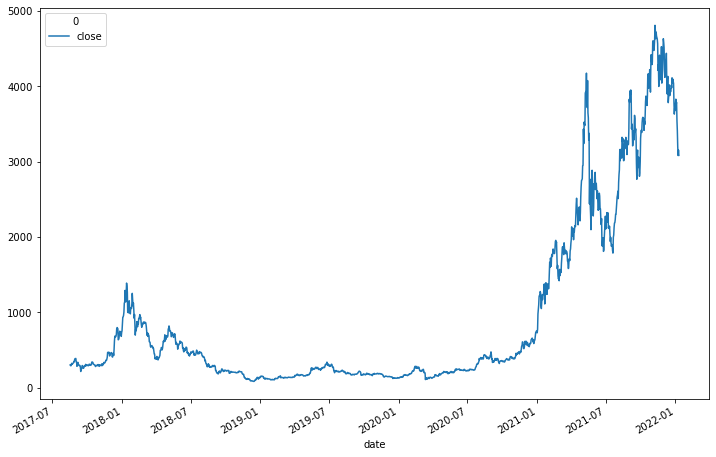

In [10]:
target.plot(figsize=(12,8))

In [11]:
target

,close
date,
2022-01-10,3082.68
2022-01-09,3151.97
2022-01-08,3080.95
2022-01-07,3199.24
2022-01-06,3406.81
...,...
2017-08-21,323.29
2017-08-20,299.10
2017-08-19,290.91


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
target

,close
date,
2022-01-10,3082.68
2022-01-09,3151.97
2022-01-08,3080.95
2022-01-07,3199.24
2022-01-06,3406.81
...,...
2017-08-21,323.29
2017-08-20,299.10
2017-08-19,290.91


In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
score = adfuller(target['close'])

In [16]:
score

(-2.7382198239819964,
 0.0676548416700306,
 17,
 1591,
 {'1%': -3.4344668334240493,
  '5%': -2.8633583388041717,
  '10%': -2.5677380487468597},
 18081.112185694165)

In [17]:
target['log_close'] = np.log(target['close'])

In [18]:
score = adfuller(target['log_close'])
print(score)

(-1.890660464935536, 0.33646739788685315, 10, 1598, {'1%': -3.4344487706424953, '5%': -2.8633503662338877, '10%': -2.567733803393165}, -4732.053939241774)


<AxesSubplot:xlabel='date'>

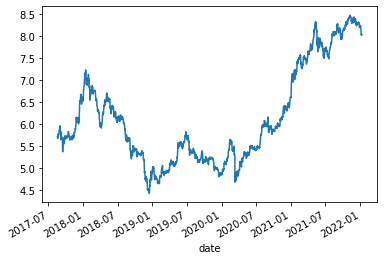

In [19]:
target['log_close'].plot()

In [20]:
target_diff = target.diff(periods=1)
target_diff.dropna(inplace=True)

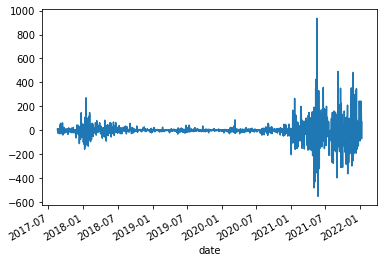

In [21]:
target_week_diff = target['close'].diff(periods=1)
target_week_diff.plot();
                                       

<AxesSubplot:xlabel='date'>

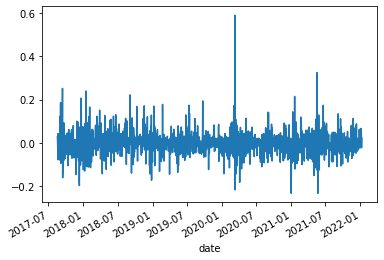

In [22]:
target_diff['log_close'].plot()

In [23]:
score = adfuller(target_diff['log_close'])
score

(-11.8266730866894,
 8.172338395483302e-22,
 9,
 1598,
 {'1%': -3.4344487706424953,
  '5%': -2.8633503662338877,
  '10%': -2.567733803393165},
 -4726.173481244683)

In [24]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

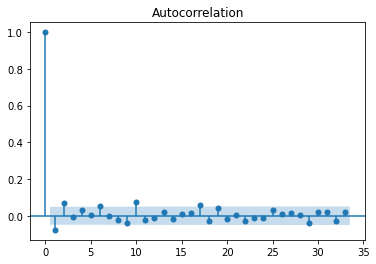

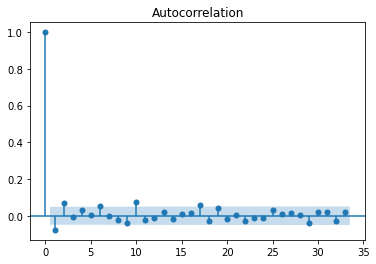

In [26]:
plot_acf(target_diff['log_close'])

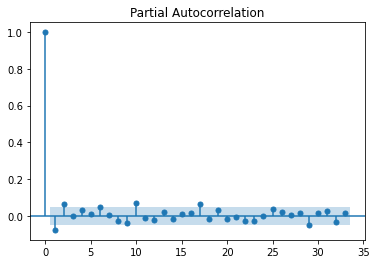

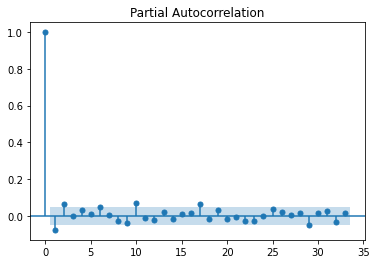

In [27]:
plot_pacf(target_diff['log_close'])

In [28]:
df

,open,high,low,close,Volume ETH
date,,,,,
2022-01-10,3151.97,3185.00,2928.83,3082.68,529818.3866
2022-01-09,3080.98,3211.72,3057.35,3151.97,275874.1643
2022-01-08,3198.68,3250.00,3000.00,3080.95,400692.1061
2022-01-07,3406.81,3416.76,3064.42,3199.24,669631.7262
2022-01-06,3539.82,3550.43,3300.00,3406.81,496745.7413
...,...,...,...,...,...
2017-08-21,299.10,346.52,294.60,323.29,5134.5400
2017-08-20,290.91,300.53,282.85,299.10,2469.4900
2017-08-19,293.96,299.90,278.00,290.91,2140.0800


In [29]:
target = target[::-1]

In [30]:
targ = target[['log_close']]

In [31]:
targ

,log_close
date,
2017-08-17,5.710427
2017-08-18,5.683444
2017-08-19,5.673014
2017-08-20,5.700778
2017-08-21,5.778550
...,...
2022-01-06,8.133532
2022-01-07,8.070669
2022-01-08,8.032993


In [32]:
targ = pd.Series(targ['log_close'])

In [33]:
targ = targ.resample('D').mean()

In [34]:
cutoff = round(targ.shape[0]*0.8)
cutoff

1286

In [35]:
train = targ[:cutoff]
test = targ[cutoff:]

In [36]:
train

date
2017-08-17    5.710427
2017-08-18    5.683444
2017-08-19    5.673014
2017-08-20    5.700778
2017-08-21    5.778550
                ...   
2021-02-18    7.570242
2021-02-19    7.578145
2021-02-20    7.556428
2021-02-21    7.567103
2021-02-22    7.483008
Freq: D, Name: log_close, Length: 1286, dtype: float64

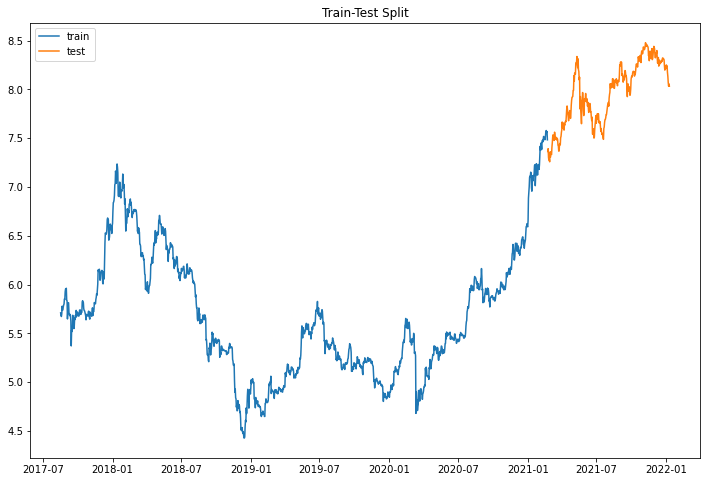

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [39]:
ar_1 = ARIMA(train, order=(2, 1, 2)).fit()

pred = ar_1.predict(typ='levels')

In [40]:
pred

date
2017-08-17    0.000000
2017-08-18    5.710427
2017-08-19    5.685321
2017-08-20    5.671978
2017-08-21    5.698125
                ...   
2021-02-18    7.522430
2021-02-19    7.570854
2021-02-20    7.582179
2021-02-21    7.560812
2021-02-22    7.567933
Freq: D, Name: predicted_mean, Length: 1286, dtype: float64

In [41]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              log_close   No. Observations:                 1286
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1924.784
Date:                Thu, 20 Jan 2022   AIC                          -3839.568
Time:                        10:44:32   BIC                          -3813.775
Sample:                    08-17-2017   HQIC                         -3829.885
                         - 02-22-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4200      0.218      1.926      0.054      -0.007       0.848
ar.L2          0.4507      0.219      2.058      0.040       0.021       0.880
ma.L1         -0.4873      0.224     -2.180      0.029      -0.926      -0.049
ma.L2         -0.3573      0.228     -1.569      0.117      -0.804       0.089
sigma2         0.0029    4.5e-05     65.076      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9465.32
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -1.28
Prob(H) (two-sided):                  0.24   Kurtosis:                        16.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
ar_1.aic

-3839.567985388261

In [43]:
pred.drop(pred.index[0], inplace=True)

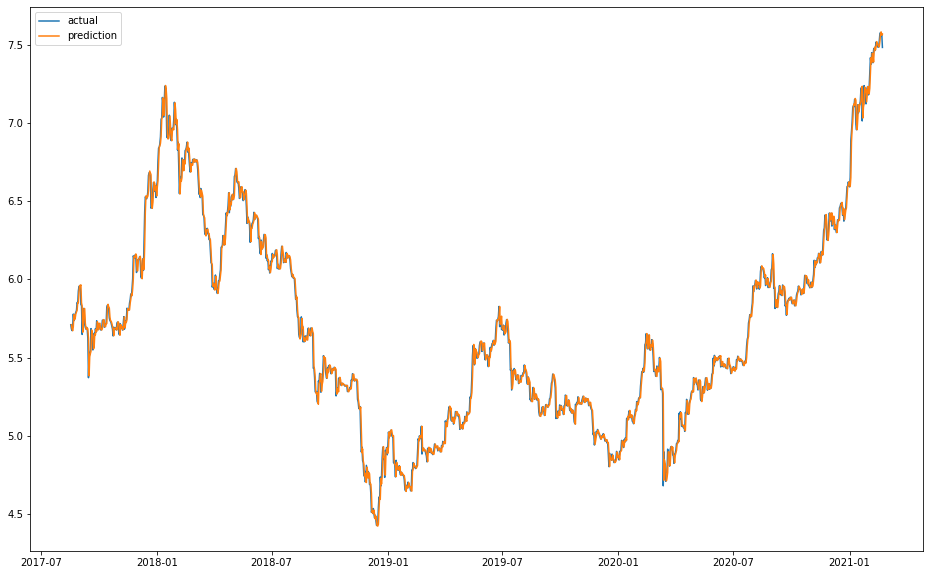

In [44]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(train, label='actual')
ax.plot(pred, label='prediction')


plt.legend();

In [45]:
from sklearn.metrics import mean_squared_error
def find_rmse(model, train_data):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))

In [46]:
find_rmse(ar_1, train)

0.1681724207190606

In [47]:
y_hat_test = ar_1.predict(start=test.index[0], end=test.index[-1],typ='levels')

In [48]:
y_hat_test

2021-02-23    7.491636
2021-02-24    7.487699
2021-02-25    7.489934
2021-02-26    7.489098
2021-02-27    7.489755
                ...   
2022-01-06    7.491262
2022-01-07    7.491262
2022-01-08    7.491262
2022-01-09    7.491262
2022-01-10    7.491262
Freq: D, Name: predicted_mean, Length: 322, dtype: float64

In [89]:
yy = ar_1.forecast(steps=3)[1]

In [90]:
yy

7.487699018583042

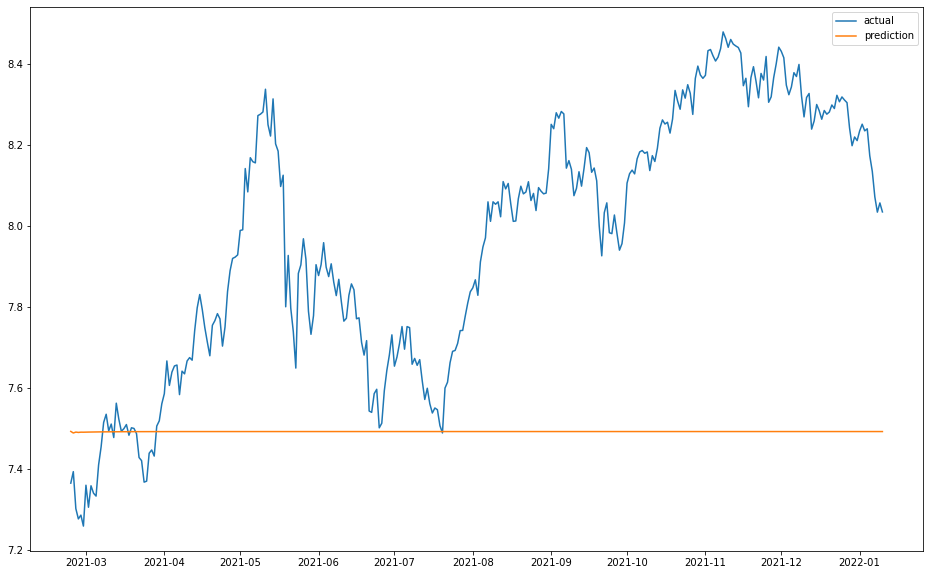

In [49]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(test, label='actual')
ax.plot(y_hat_test, label='prediction')


plt.legend();

In [50]:
t = targ.resample('W').mean()

In [51]:
cutoff = round(t.shape[0]*0.85)
cutoff

196

In [52]:
train_w = t[:cutoff]
test_w = t[cutoff:]

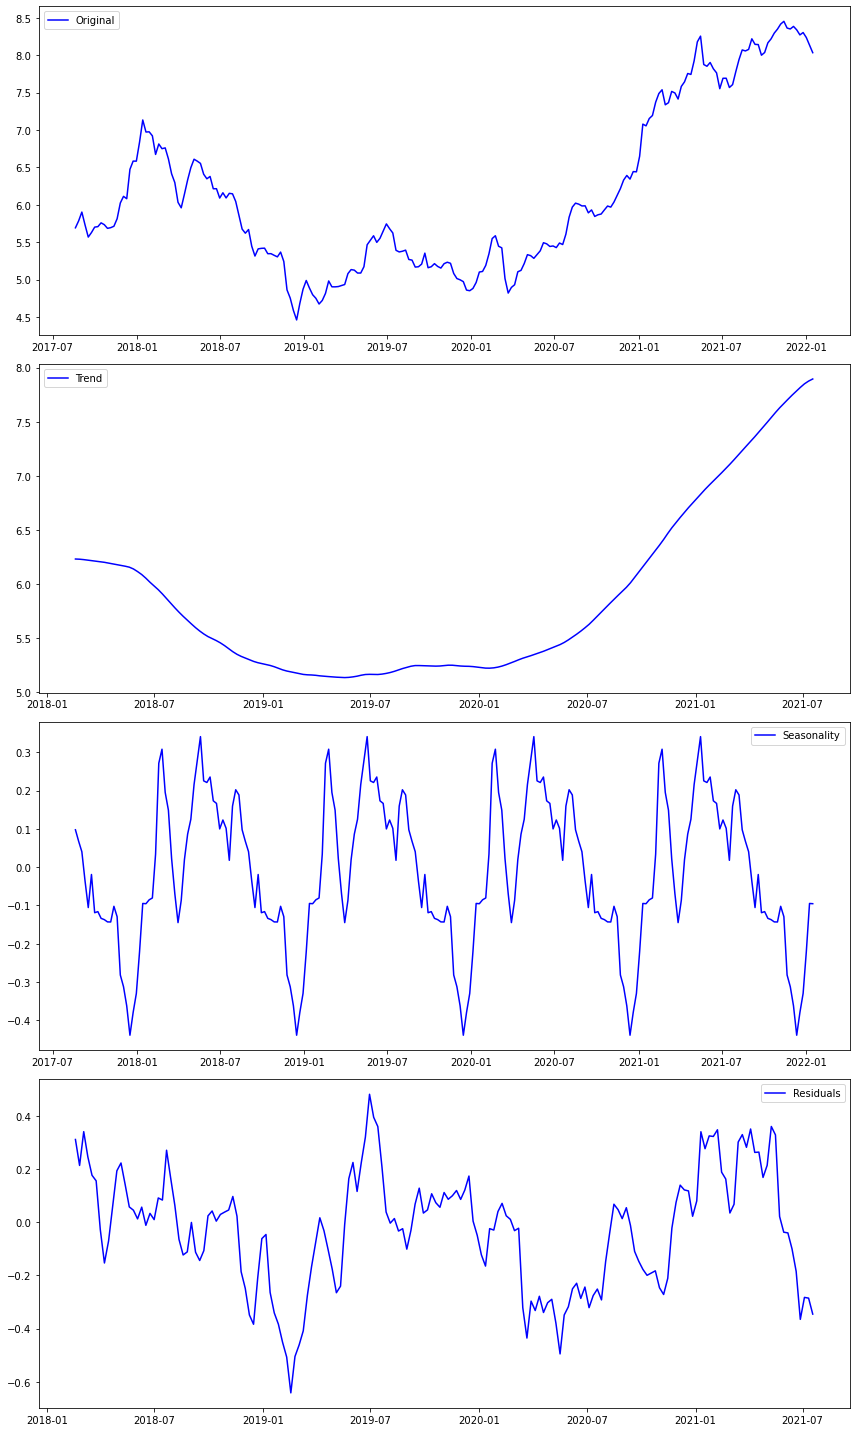

In [57]:
decomposition = seasonal_decompose(t)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,20))
plt.subplot(411)
plt.plot(t, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [58]:
t

date
2017-08-20    5.691916
2017-08-27    5.784729
2017-09-03    5.902198
2017-09-10    5.729518
2017-09-17    5.568113
                ...   
2021-12-19    8.271396
2021-12-26    8.303003
2022-01-02    8.236178
2022-01-09    8.133944
2022-01-16    8.033555
Freq: W-SUN, Name: log_close, Length: 231, dtype: float64

In [91]:
train_size = int(len(t) * 0.85)
train, test = t[0:train_size], t[train_size:]


In [92]:
len(test)

35

In [59]:
def evaluate_arima_model(X, arima_order):

    train_size = int(len(X) * 0.85)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()
        predictions.append(yhat)
        history.append(test[t])

    error = mean_squared_error(test, predictions)
    return error

In [60]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [102]:
def graph_arima(X, order):
    
    train_size = int(len(X) * 0.85)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()
        predictions.append(yhat)
        history.append(test[t])
    
    df_prediction = pd.DataFrame(predictions, index = test.index, columns = ['prediction'])
    
    fig, ax = plt.subplots(figsize=(16,10))

    ax.plot(test, label='actual')
    ax.plot(df_prediction, label='prediction')


    plt.legend();

In [61]:
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(t, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=4.400
ARIMA(0, 0, 1) MSE=1.191
ARIMA(0, 0, 2) MSE=0.387
ARIMA(0, 0, 3) MSE=0.209
ARIMA(0, 0, 4) MSE=0.126
ARIMA(0, 1, 0) MSE=0.012
ARIMA(0, 1, 1) MSE=0.012
ARIMA(0, 1, 2) MSE=0.013
ARIMA(0, 1, 3) MSE=0.013
ARIMA(0, 1, 4) MSE=0.013
ARIMA(0, 2, 0) MSE=0.023
ARIMA(0, 2, 1) MSE=0.015
ARIMA(0, 2, 2) MSE=0.014
ARIMA(0, 2, 3) MSE=0.014
ARIMA(0, 2, 4) MSE=0.014
ARIMA(1, 0, 0) MSE=0.012
ARIMA(1, 0, 1) MSE=0.013
ARIMA(1, 0, 2) MSE=0.013
ARIMA(1, 0, 3) MSE=0.013
ARIMA(1, 0, 4) MSE=0.014
ARIMA(1, 1, 0) MSE=0.013
ARIMA(1, 1, 1) MSE=0.013
ARIMA(1, 1, 2) MSE=0.013
ARIMA(1, 1, 3) MSE=0.013
ARIMA(1, 1, 4) MSE=0.014
ARIMA(1, 2, 0) MSE=0.021
ARIMA(1, 2, 1) MSE=0.014
ARIMA(1, 2, 2) MSE=0.014
ARIMA(1, 2, 3) MSE=0.014
ARIMA(1, 2, 4) MSE=0.015
ARIMA(2, 0, 0) MSE=0.013
ARIMA(2, 0, 1) MSE=0.013
ARIMA(2, 0, 2) MSE=0.013
ARIMA(2, 0, 3) MSE=0.013
ARIMA(2, 0, 4) MSE=0.013
ARIMA(2, 1, 0) MSE=0.013
ARIMA(2, 1, 1) MSE=0.013
ARIMA(2, 1, 2) MSE=0.013
ARIMA(2, 1, 3) MSE=0.013
ARIMA(2, 1, 4) MSE=0.012


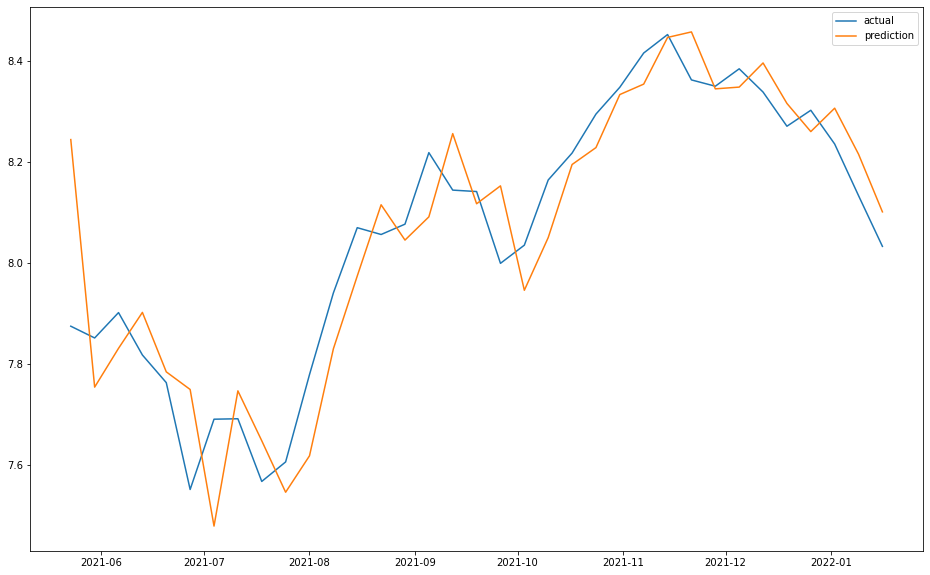

In [104]:
order = (2, 1, 4)
graph_arima(t, order)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sari_mod = SARIMAX(train_w,
                  order=(1, 1, 1),
                  seasonal_order=(0, 1, 1, 52),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

In [ ]:
forecast = sari_mod.forecast(steps=35)

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(test_w, label='actual')
ax.plot(forecast, label='prediction')


plt.legend();

In [ ]:
train_w_for_graph = t[:cutoff+1]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train_w_for_graph, label='train')
ax.plot(test_w, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [ ]:
target_w = target.resample('W').mean()

In [ ]:
target_w

In [ ]:
target_w['log_c'] = np.log(target_w['close'])

In [ ]:
target_w

In [ ]:
train_week = target_w['close'][:cutoff]
test_week = target_w['close'][cutoff:]

In [ ]:
train_w

In [ ]:
test_w

In [ ]:
from joblib import Parallel
from joblib import delayed
from multiprocessing import cpu_count
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error